In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436603

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436603

In [9]:
model = keras.models.load_model('modelos/modeloGeneral/stacked_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436603

13644/13644 [==============================] - 252s 18ms/step


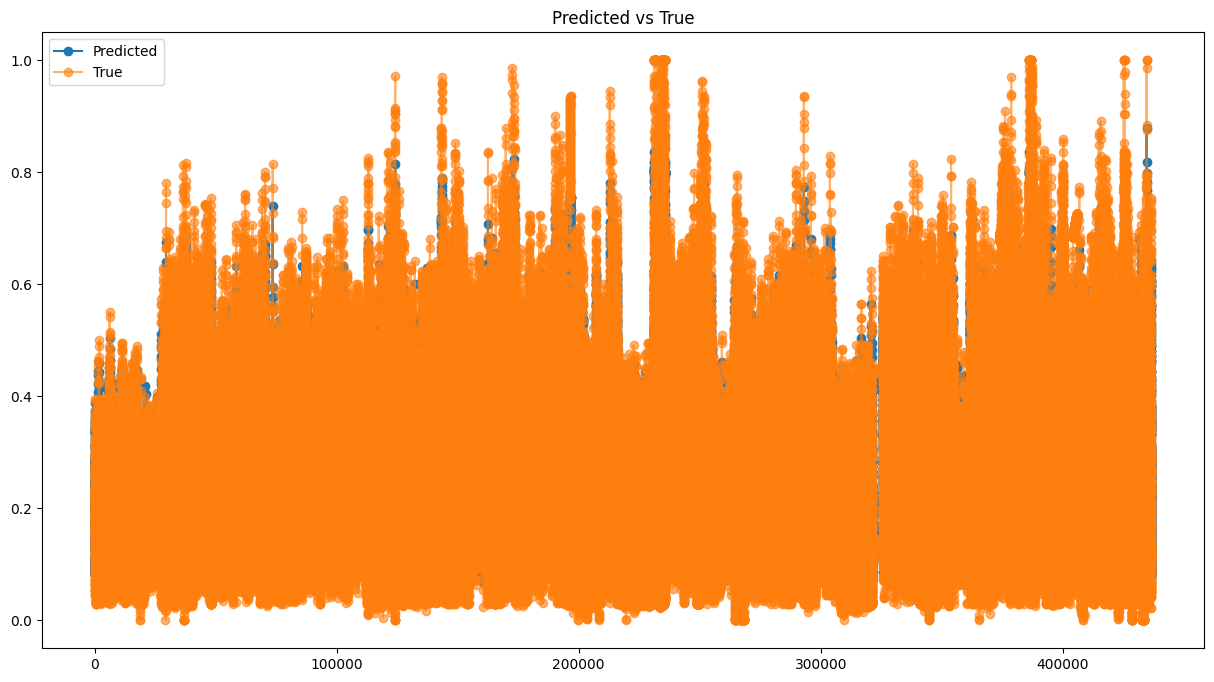

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.021316037152488684,
 'mse': 0.03003775612521867,
 'rmse': 0.0009022667930381117}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          145.346130
1          143.192505
2          143.448349
3          143.390015
4          152.476425
...               ...
436598     129.851898
436599     163.722488
436600     197.432510
436601     202.419922
436602     224.429245

[436603 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436598          137.0
436599          177.0
436600          198.0
436601          216.0
436602          233.0

[436603 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  145.346130
2023-01-01 00:15:00   140.0  143.192505
2023-01-01 00:30:00   139.0  143.448349
2023-01-01 00:45:00   145.0  143.390015
2023-01-01 01:00:00   159.0  152.476425
...                     ...         ...
2035-06-14 21:30:00   137.0  129.851898
2035-06-14 21:45:00   177.0  163.722488
2035-06-14 22:00:00   198.0  197.432510
2035-06-14 22:15:00   216.0  202.419922
2035-06-14 22:30:00   233.0  224.429245

[436603 rows x 2 columns]

AP, BE, EP: (0.9568165056504551, 0.009777783885552517, 0.03340571046399238)


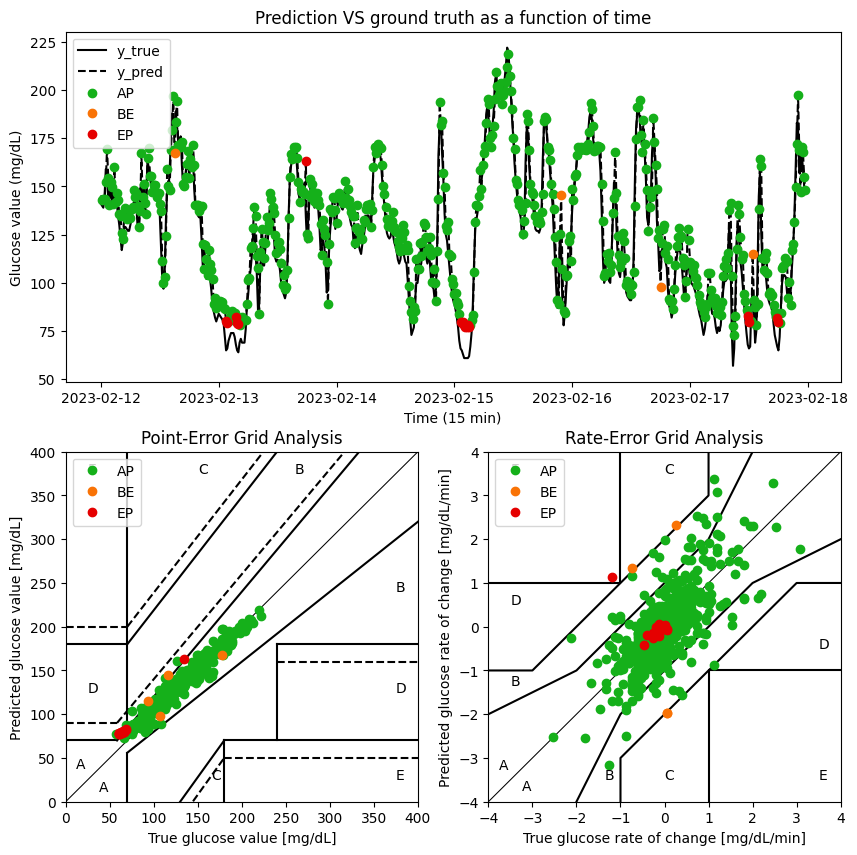

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-12 00:00:00   141.0  145.346130       NaN       NaN    NaN   
1      2023-02-12 00:15:00   140.0  143.192505 -0.066667 -0.143575     AP   
2      2023-02-12 00:30:00   139.0  143.448349 -0.066667  0.017056     AP   
3      2023-02-12 00:45:00   145.0  143.390015  0.400000 -0.003889     AP   
4      2023-02-12 01:00:00   159.0  152.476425  0.933333  0.605761     AP   
...                    ...     ...         ...       ...       ...    ...   
436598 2035-07-26 21:30:00   137.0  129.851898  2.333333  2.560381     AP   
436599 2035-07-26 21:45:00   177.0  163.722488  2.666667  2.258039     AP   
436600 2035-07-26 22:00:00   198.0  197.432510  1.400000  2.247335     AP   
436601 2035-07-26 22:15:00   216.0  202.419922  1.200000  0.332494     AP   
436602 2035-07-26 22:30:00   233.0  224.429245  1.133333  1.467288     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436598     A     A  
436599     A     A  
436600     A     A  
436601     A     A  
436602     A     A  

[436603 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 91ms/step


Glucose level Predict  Glucose level True
0               0.229013            0.219565
1               0.224332            0.217391

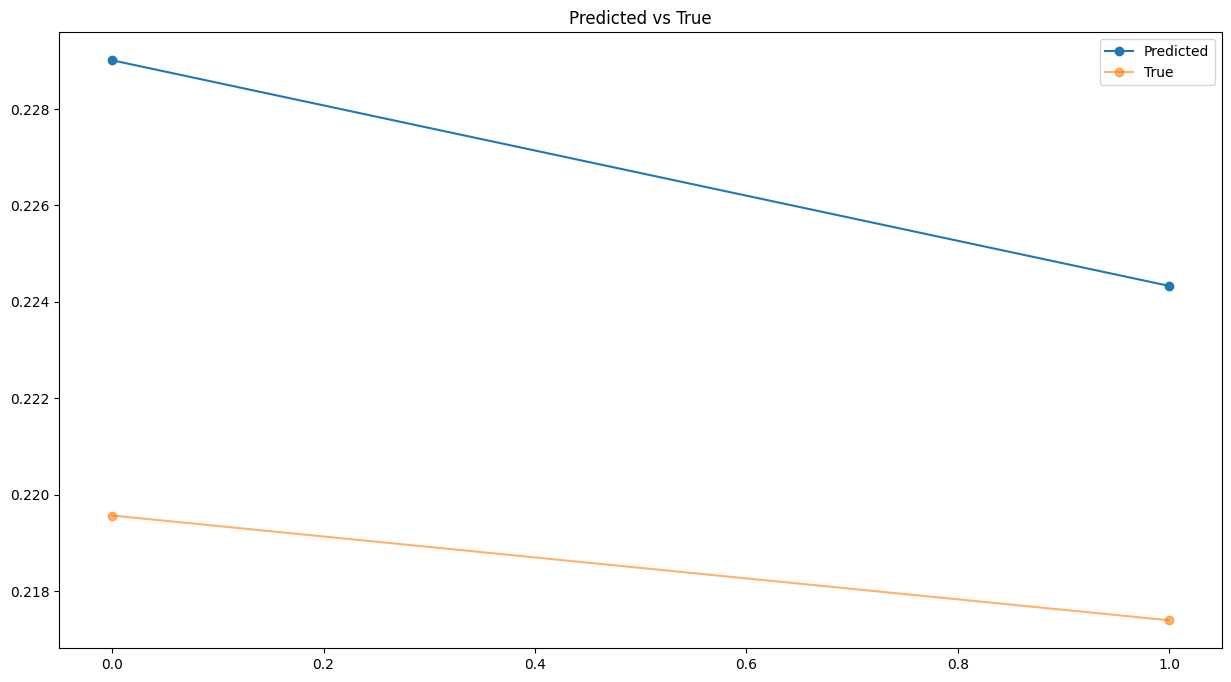

{'mae': 0.008194164996561781,
 'mse': 0.008289554210903128,
 'rmse': 6.871670901550177e-05}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             145.346130               141.0
1             143.192505               140.0

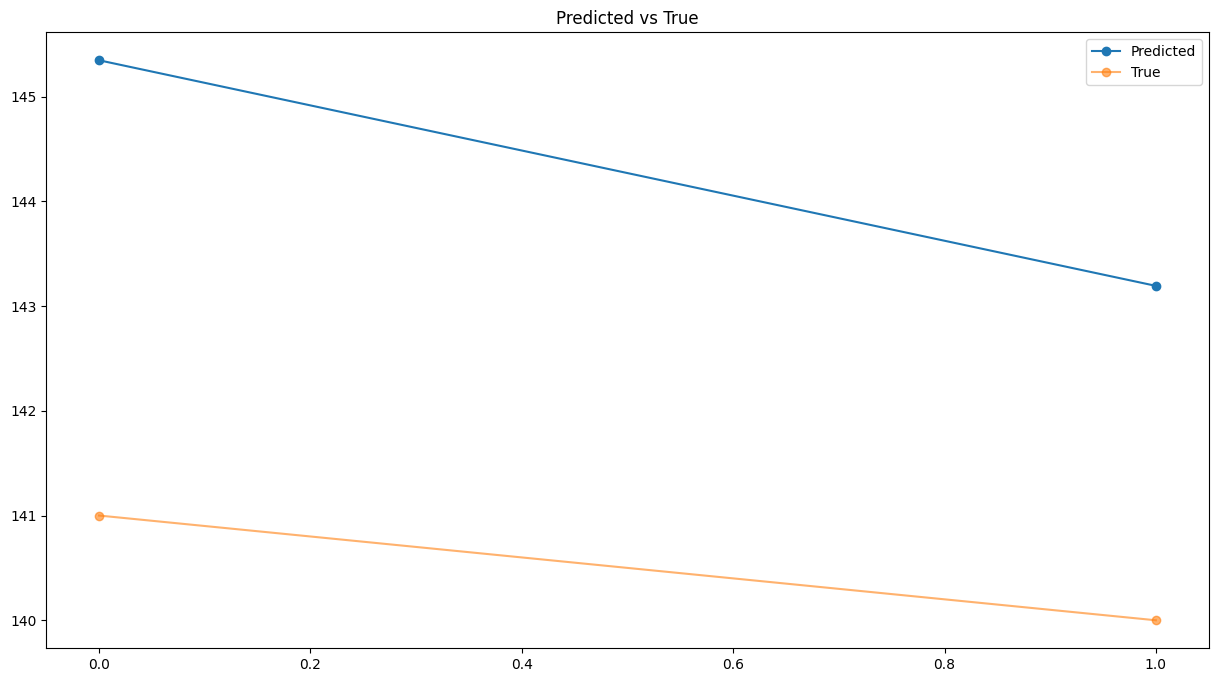

{'mae': 3.769317626953125,
 'mse': 3.8131966005783884,
 'rmse': 14.540468314662576}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 44ms/step


Glucose level Predict  Glucose level True
0               0.229013            0.219565
1               0.240010            0.217391

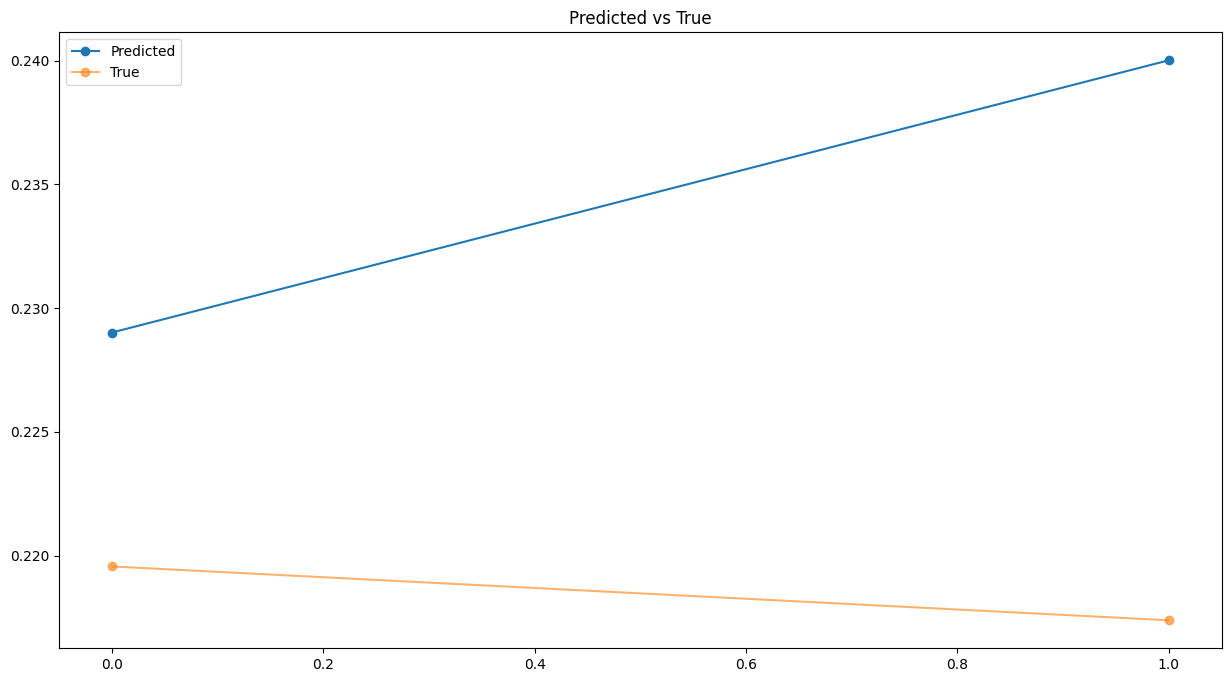

{'mae': 0.01603342748206593,
 'mse': 0.017333125819494442,
 'rmse': 0.0003004372506744249}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             145.346130               141.0
1             150.404633               140.0

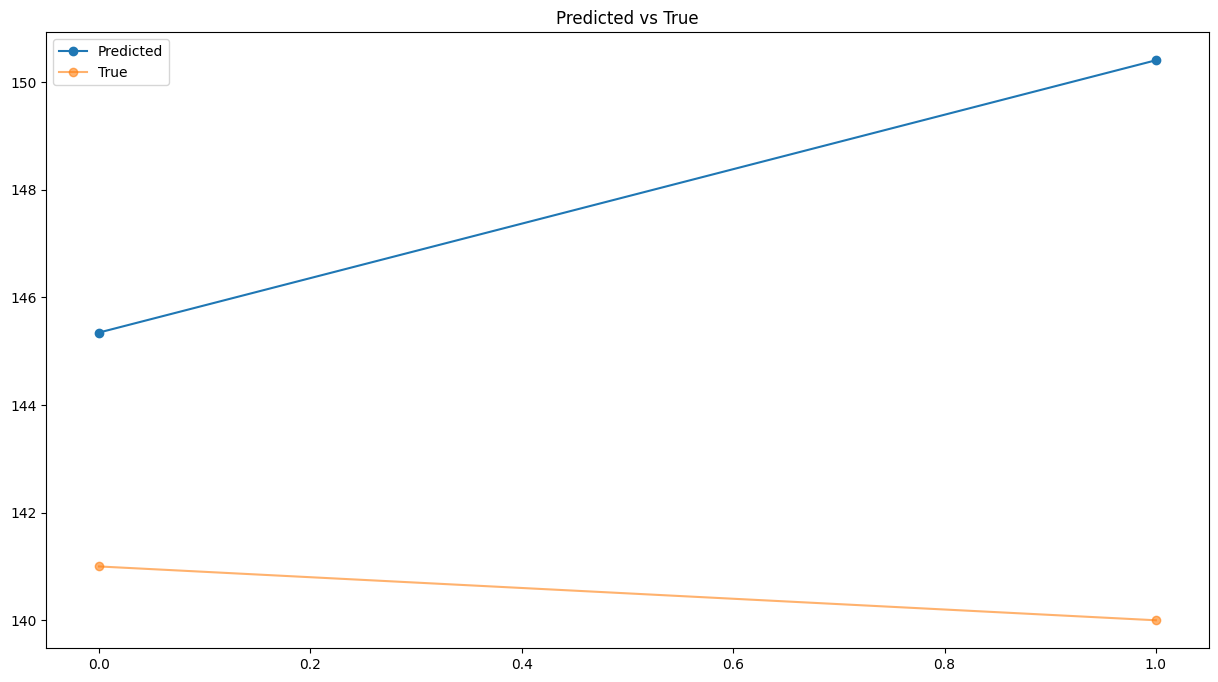

{'mae': 7.3753814697265625,
 'mse': 7.973243633713575,
 'rmse': 63.57261404255405}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 11ms/step


Glucose level Predict  Glucose level True
0               0.232842            0.182609
1               0.160226            0.154348
2               0.163608            0.152174
3               0.171020            0.150000
4               0.163071            0.123913

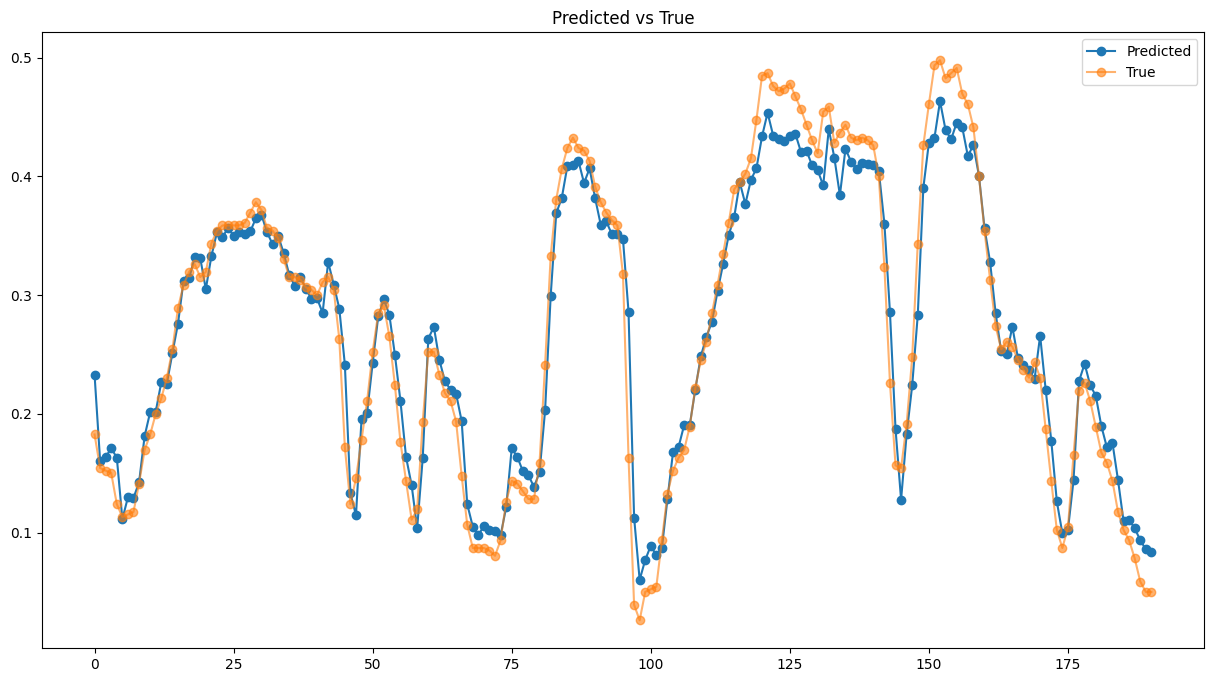

{'mae': 0.019888306823456287,
 'mse': 0.02600883137951406,
 'rmse': 0.0006764593097279952}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

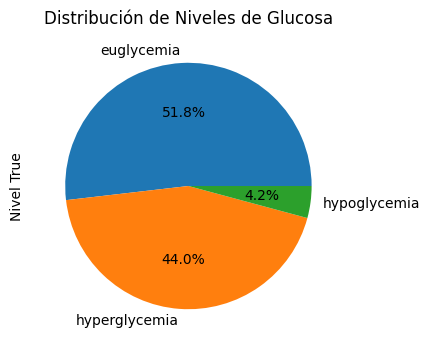

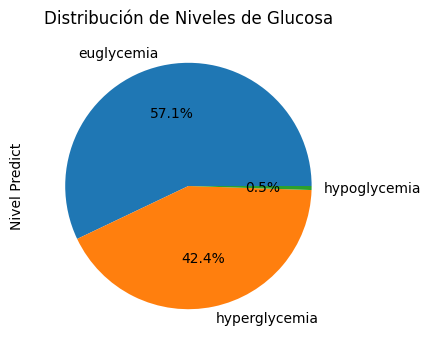

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             147.107422    euglycemia
1               111.0  euglycemia             113.703850    euglycemia
2               110.0  euglycemia             115.259705    euglycemia
3               109.0  euglycemia             118.669411    euglycemia
4                97.0  euglycemia             115.012726    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


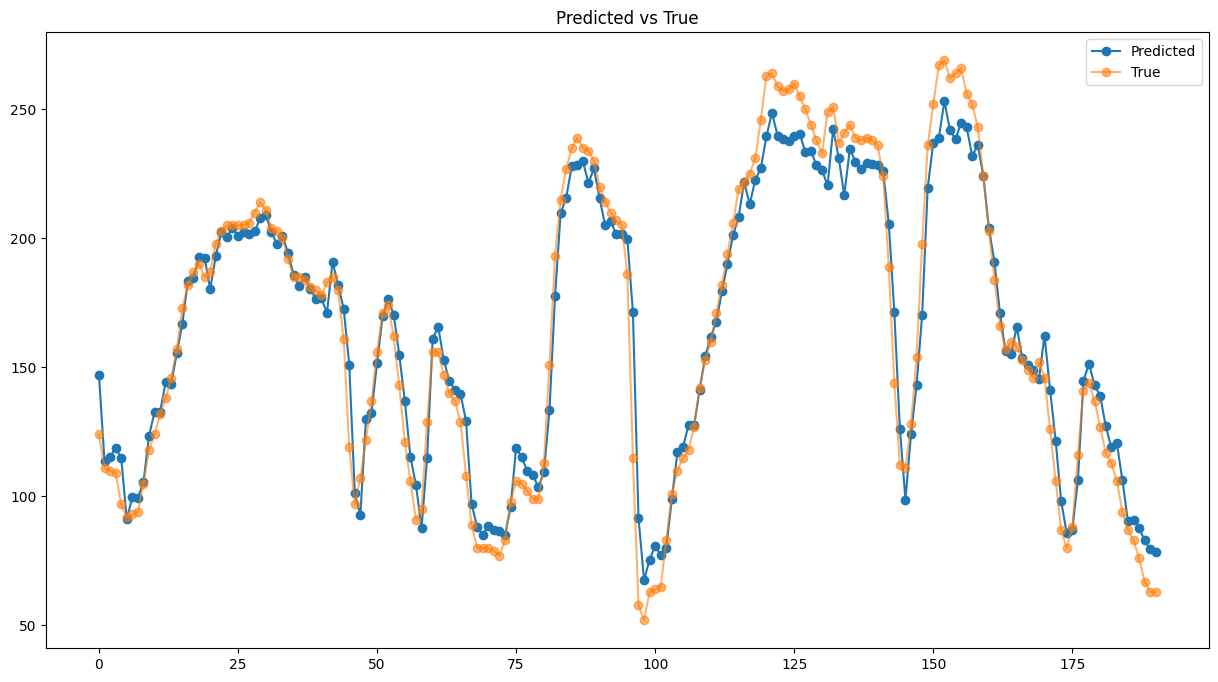

{'mae': 9.148621124746912,
 'mse': 11.964063359006078,
 'rmse': 143.13881205831177}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  147.107422
2023-01-01 00:15:00   111.0  113.703850
2023-01-01 00:30:00   110.0  115.259705
2023-01-01 00:45:00   109.0  118.669411
2023-01-01 01:00:00    97.0  115.012726
...                     ...         ...
2023-01-02 22:30:00    83.0   90.925713
2023-01-02 22:45:00    76.0   87.602905
2023-01-02 23:00:00    67.0   83.071312
2023-01-02 23:15:00    63.0   79.435074
2023-01-02 23:30:00    63.0   78.419258

[191 rows x 2 columns]

AP, BE, EP: (0.9736842105263158, 0.0, 0.02631578947368421)


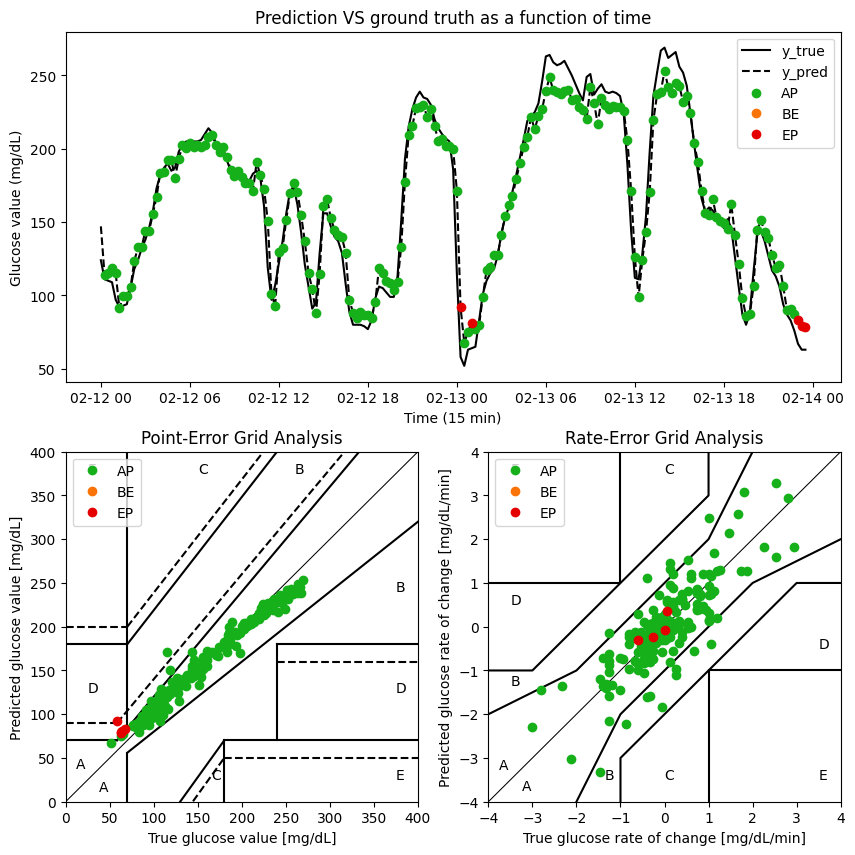

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 1s 9ms/step


Glucose level Predict  Glucose level True
0               0.360511            0.373913
1               0.374370            0.400000
2               0.401758            0.404348
3               0.381007            0.406522
4               0.393985            0.397826

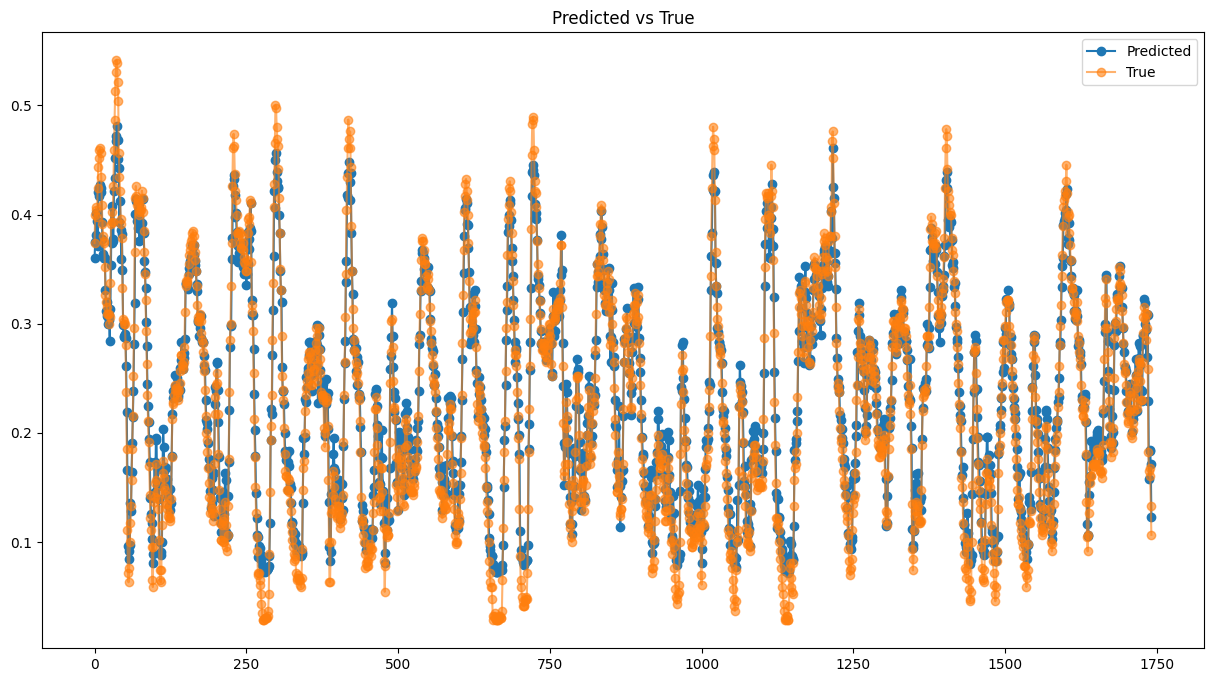

{'mae': 0.015921264051630857,
 'mse': 0.01975415355175281,
 'rmse': 0.00039022658254622813}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

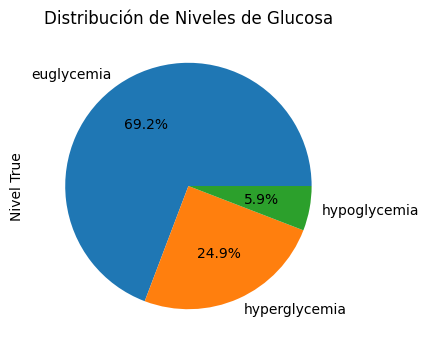

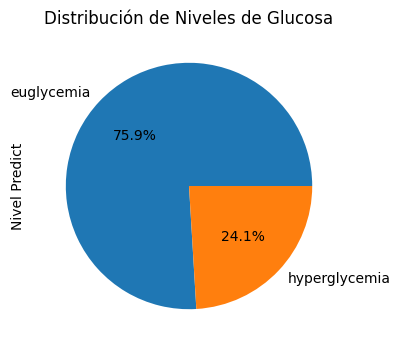

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             205.834900  hyperglycemia
1               224.0  hyperglycemia             212.210190  hyperglycemia
2               226.0  hyperglycemia             224.808914  hyperglycemia
3               227.0  hyperglycemia             215.263321  hyperglycemia
4               223.0  hyperglycemia             221.233307  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


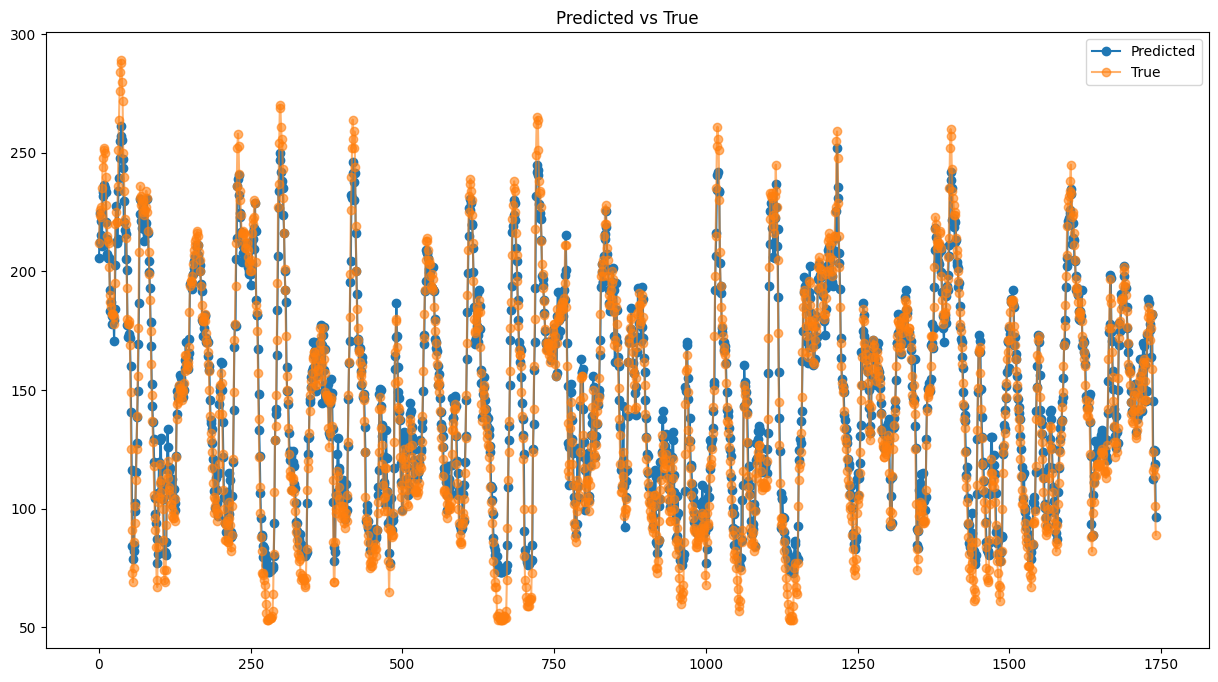

{'mae': 7.323781087286299, 'mse': 9.086910362303703, 'rmse': 82.5719399325424}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  205.834900
2023-01-01 00:15:00   224.0  212.210190
2023-01-01 00:30:00   226.0  224.808914
2023-01-01 00:45:00   227.0  215.263321
2023-01-01 01:00:00   223.0  221.233307
...                     ...         ...
2023-01-19 02:15:00   116.0  112.536888
2023-01-19 02:30:00   117.0  124.782829
2023-01-19 02:45:00   114.0  124.245064
2023-01-19 03:00:00   101.0  118.742317
2023-01-19 03:15:00    89.0   96.335625

[1742 rows x 2 columns]

AP, BE, EP: (0.9551981619758759, 0.0022975301550832855, 0.04250430786904078)


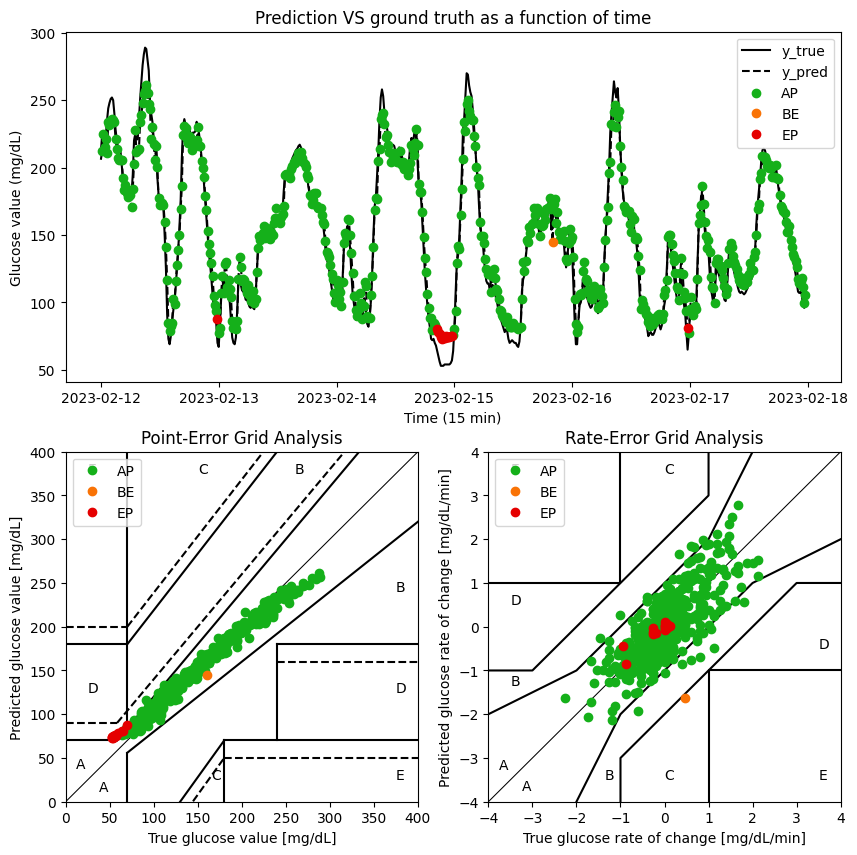

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 2s 17ms/step


Glucose level Predict  Glucose level True
0               0.270191            0.261858
1               0.243155            0.229051
2               0.218441            0.196245
3               0.189483            0.163439
4               0.155931            0.130632

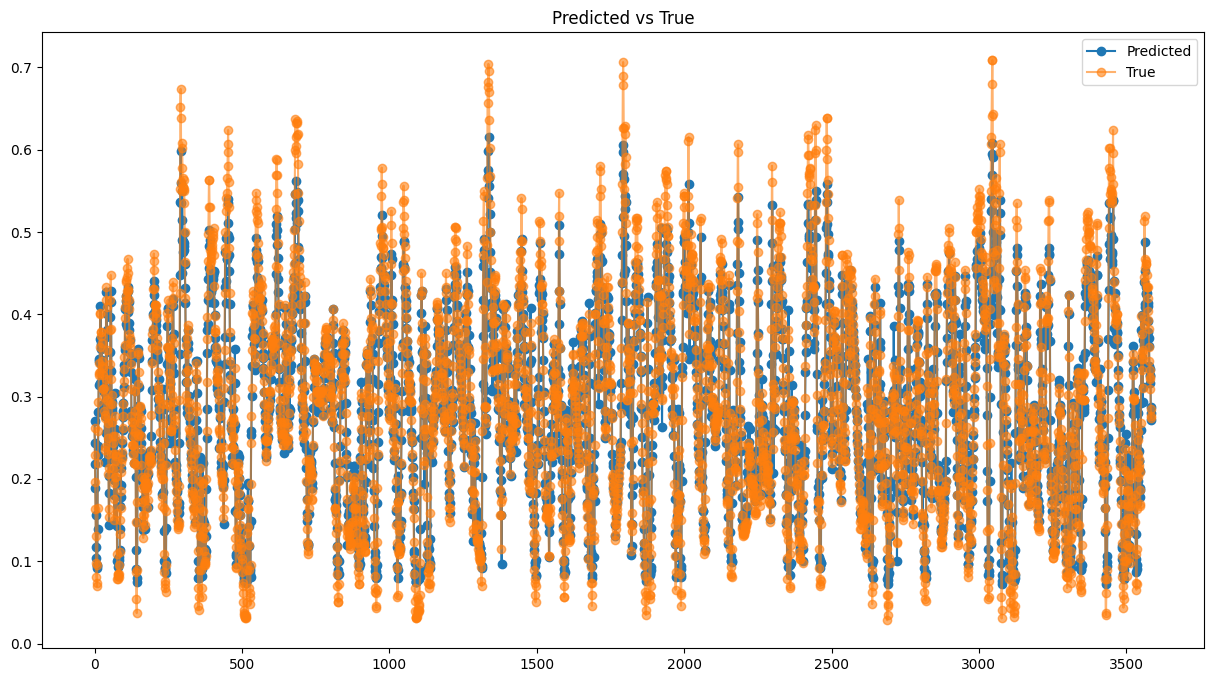

{'mae': 0.022805690527149796,
 'mse': 0.030479941588793392,
 'rmse': 0.000929026839256257}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

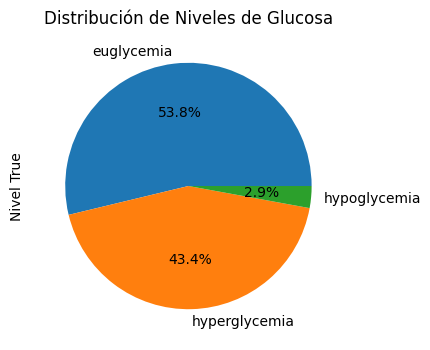

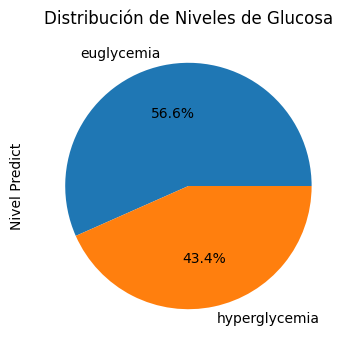

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0          160.454545  euglycemia             164.287766    euglycemia
1          145.363636  euglycemia             151.851257    euglycemia
2          130.272727  euglycemia             140.483002    euglycemia
3          115.181818  euglycemia             127.162247    euglycemia
4          100.090909  euglycemia             111.728127    euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


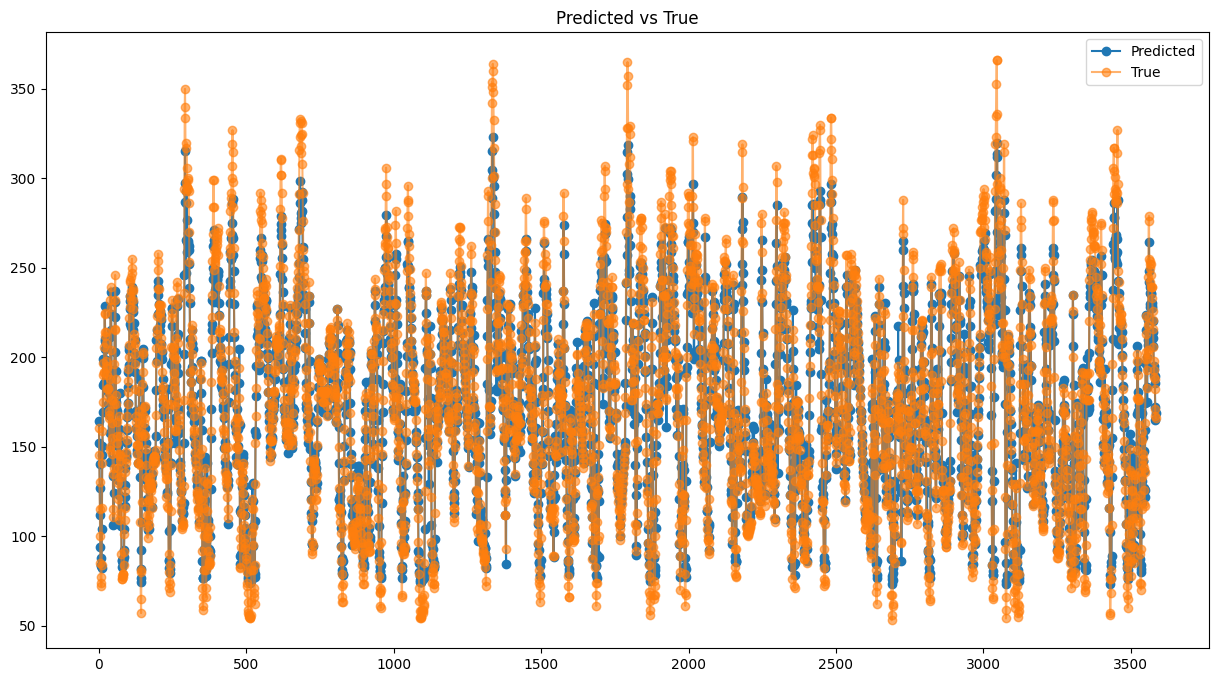

{'mae': 10.490618531073487,
 'mse': 14.020774808354835,
 'rmse': 196.58212622659755}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  164.287766
2023-01-01 00:15:00  145.363636  151.851257
2023-01-01 00:30:00  130.272727  140.483002
2023-01-01 00:45:00  115.181818  127.162247
2023-01-01 01:00:00  100.090909  111.728127
...                         ...         ...
2023-02-07 07:15:00  188.000000  185.479828
2023-02-07 07:30:00  182.000000  189.424606
2023-02-07 07:45:00  171.000000  172.362106
2023-02-07 08:00:00  167.000000  165.200668
2023-02-07 08:15:00  166.000000  168.706833

[3586 rows x 2 columns]

AP, BE, EP: (0.9631799163179916, 0.014225941422594143, 0.022594142259414227)


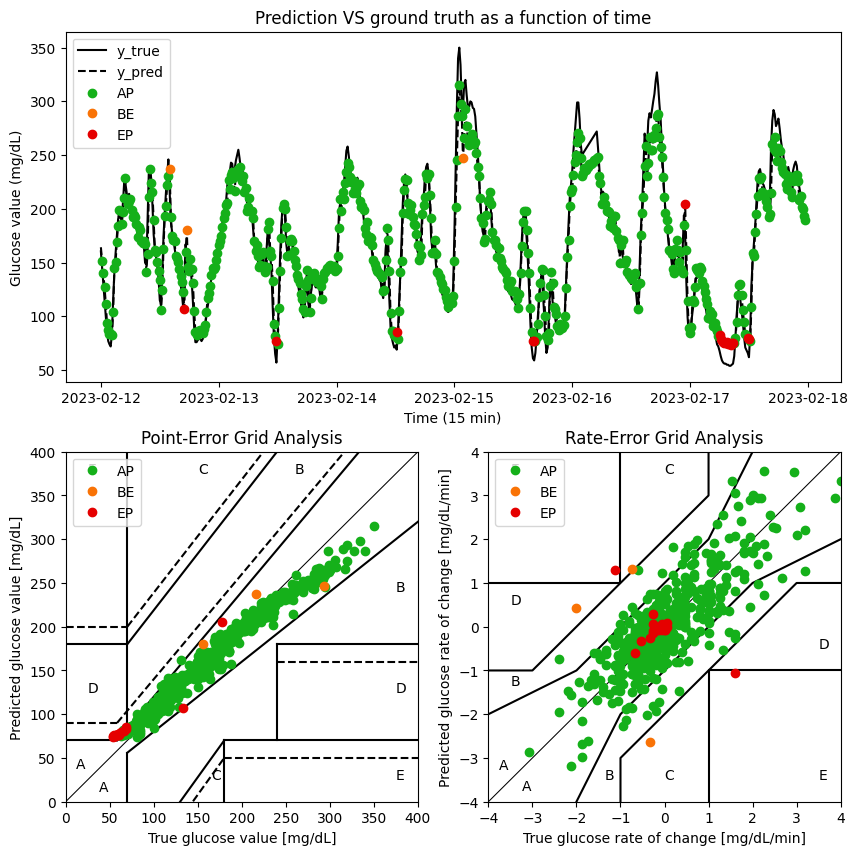

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 2s 10ms/step


Glucose level Predict  Glucose level True
0               0.478909            0.534783
1               0.465076            0.500000
2               0.427599            0.484783
3               0.438765            0.463043
4               0.413214            0.428261

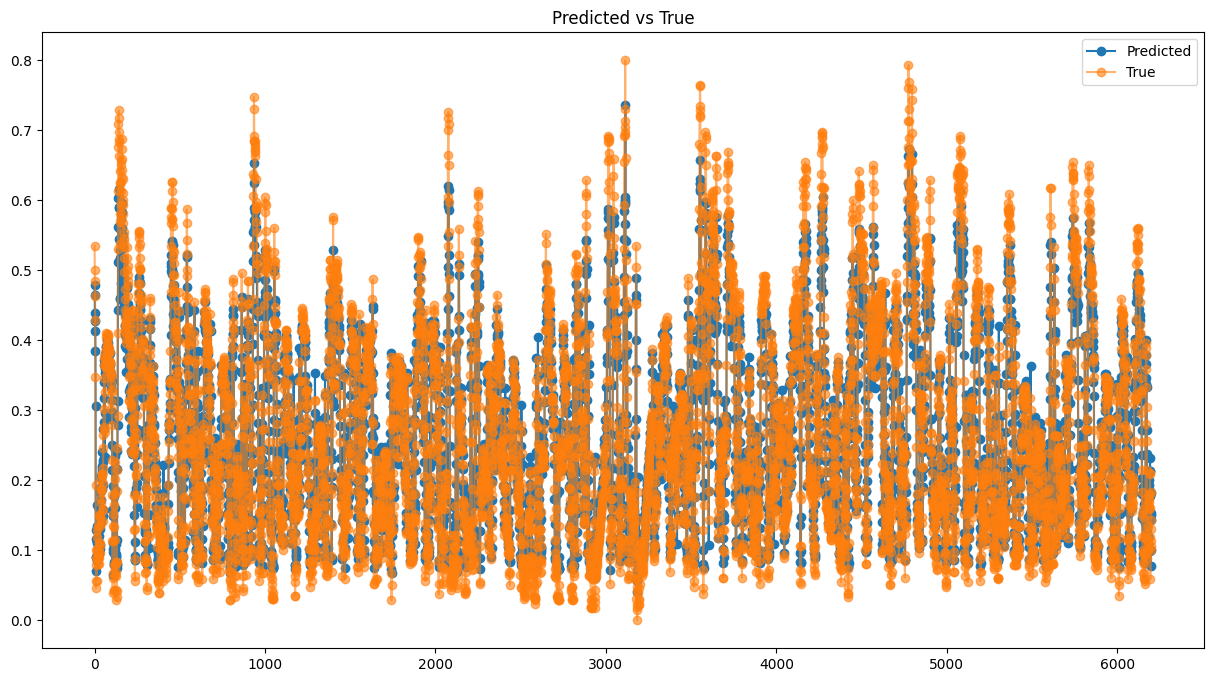

{'mae': 0.026622689479556535,
 'mse': 0.03601468612221511,
 'rmse': 0.0012970576164816738}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

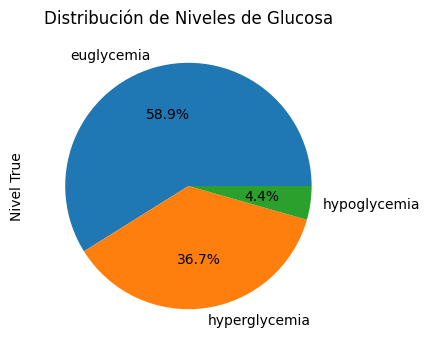

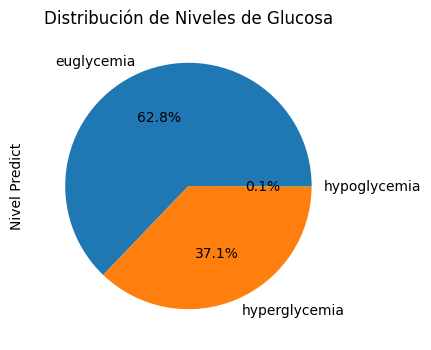

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             260.297943  hyperglycemia
1               270.0  hyperglycemia             253.934906  hyperglycemia
2               263.0  hyperglycemia             236.695557  hyperglycemia
3               253.0  hyperglycemia             241.832016  hyperglycemia
4               237.0  hyperglycemia             230.078217  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


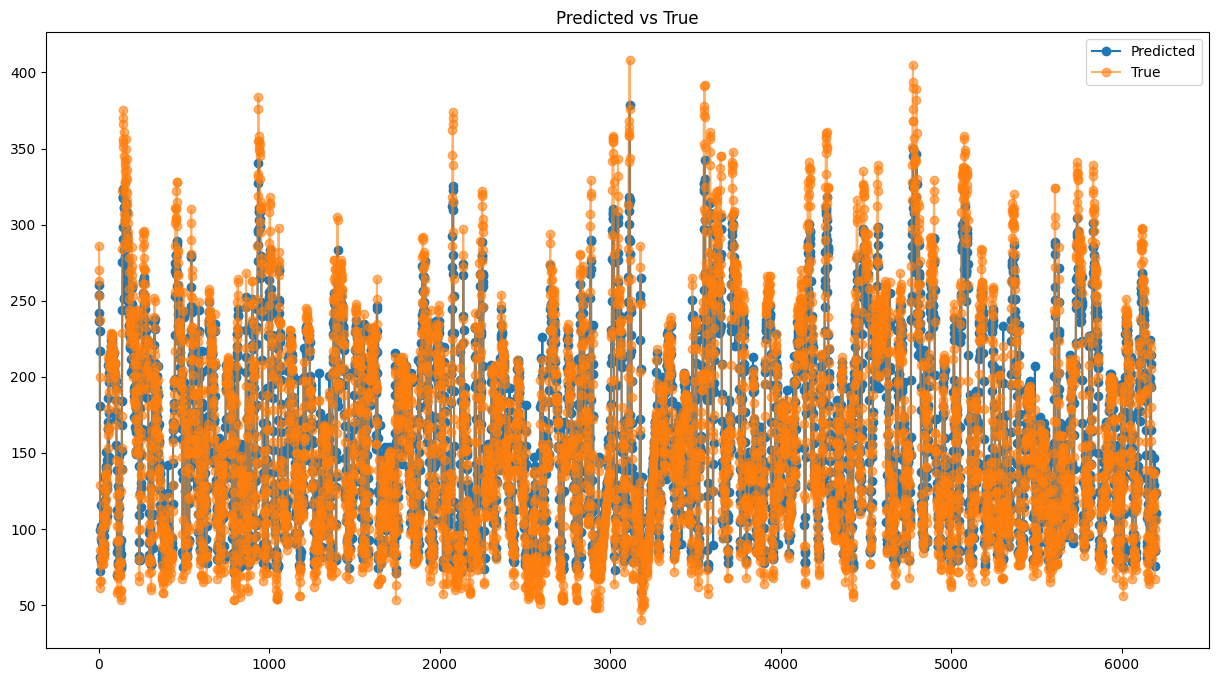

{'mae': 12.246438165733515,
 'mse': 16.566757808859624,
 'rmse': 274.4574642974114}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  260.297943
2023-01-01 00:15:00   270.0  253.934906
2023-01-01 00:30:00   263.0  236.695557
2023-01-01 00:45:00   253.0  241.832016
2023-01-01 01:00:00   237.0  230.078217
...                     ...         ...
2023-03-06 13:00:00   100.0  109.107025
2023-03-06 13:15:00    89.0  105.784103
2023-03-06 13:30:00    92.0   86.197861
2023-03-06 13:45:00   106.0  110.240997
2023-03-06 14:00:00   124.0  123.669434

[6201 rows x 2 columns]

AP, BE, EP: (0.9483870967741935, 0.02258064516129032, 0.02903225806451613)


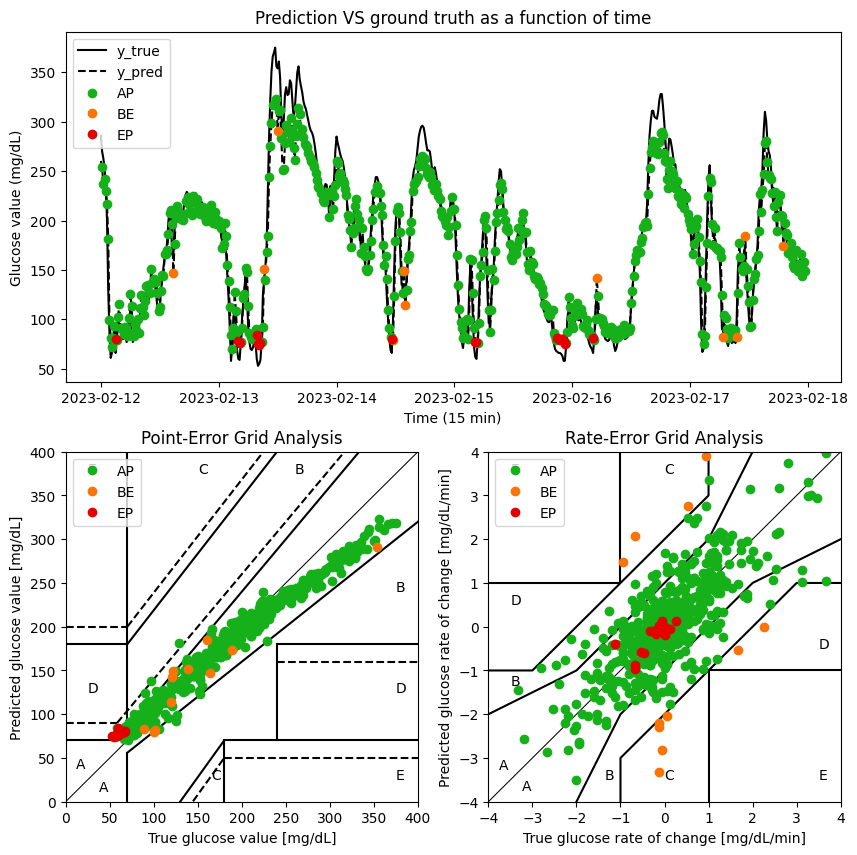

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)